# Learning Plotting

Plotting is basically using the `Plots` package, we'll save dataframes for later.

In [1]:
using Plots

Generate some data. The range 1-10 is somewhat boring so we'll have to do a little better, but not a lot.

In [6]:
some_numbers = -10:10

-10:10

Let's square them as well, so we have something more than a straight line.

In [9]:
some_numbers_sq = some_numbers ^ 2

MethodError: MethodError: no method matching ^(::UnitRange{Int64}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:885
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:155
  ...

Hmmm... this might be due to some broadcasting stuff, we might have to use `.^` instead of just `^` to raise it to the power of 2.

In [10]:
some_numbers_sq = some_numbers .^ 2

21-element Array{Int64,1}:
 100
  81
  64
  49
  36
  25
  16
   9
   4
   1
   0
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

Ah... better. But I'm still really annoyed that julia tries to print everything.

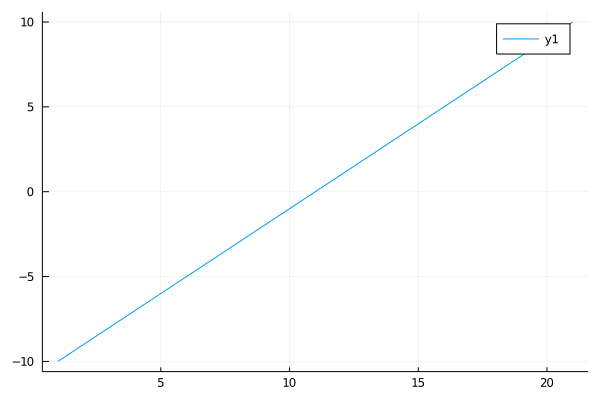

In [20]:
plot(some_numbers)

Julia has a cold-start problem, that took quite a while. But anyways: look mommy we did a line!

OK, don't overinterpret that. So, we charge forward trying to plot some more.

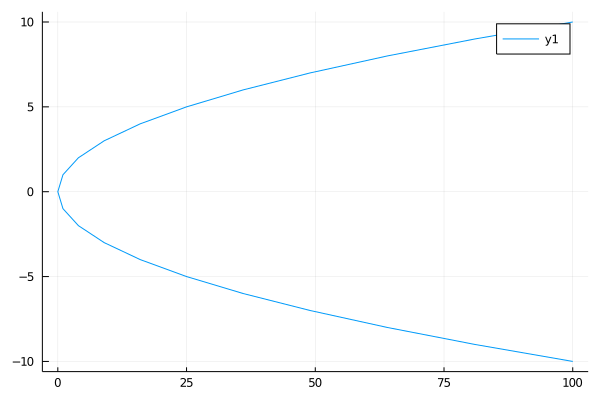

In [13]:
plot(some_numbers_sq, some_numbers)

OK brain fart there, rearrange the arguments. X is first argument, Y is second.

In [25]:
some_numbers_sq_2 = copy(some_numbers_sq)

21-element Array{Int64,1}:
 100
  81
  64
  49
  36
  25
  16
   9
   4
   1
   0
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

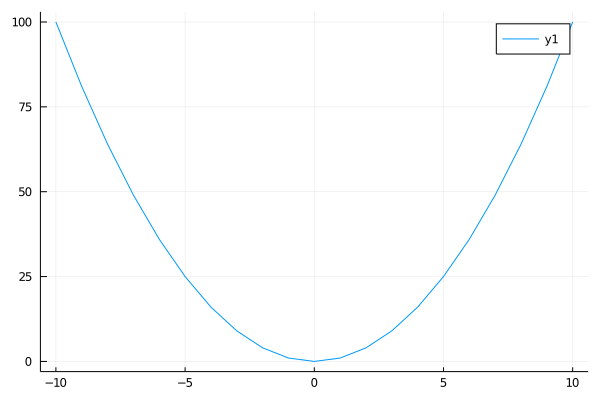

In [29]:
plot(some_numbers, some_numbers_sq_2)

Yay this was fairly intuitive.

OK, a few notes: Line plot seems to be the default, nothing wrong with that, and it interpolates (also this pretty OK default behabvior).

Hmmm... This made sense until I tried to read a tutorial. below shows something completely different, with two lines and everything. And also these lines be jagged.

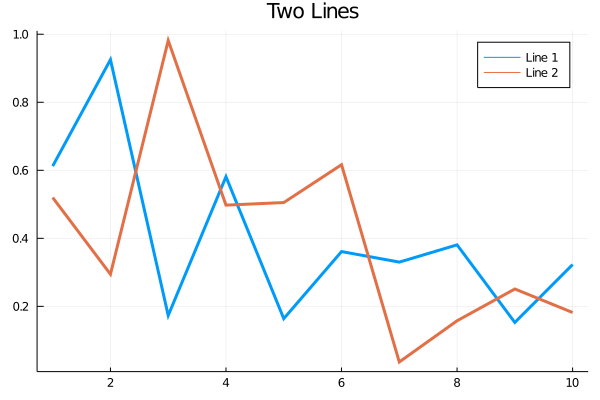

In [19]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

Ah... now i see. The first argument (X) actually *is* the values from the x-axis, and the Y argument is actually *two* lines. Actually that's what the comment says outright, but reading things is for suckers. Just ask yourself right now.

In [30]:
x = 1:10; y = rand(10, 3) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2", "Line 3"], lw = 3)

LoadError: syntax: unexpected comma in matrix expression

In [35]:
rand(10, 3)

10×3 Array{Float64,2}:
 0.127317  0.952234   0.959276
 0.636185  0.749114   0.54724
 0.255629  0.70124    0.745865
 0.192724  0.0016369  0.902433
 0.1281    0.202424   0.0861309
 0.89719   0.636984   0.210295
 0.263139  0.0368932  0.228218
 0.180152  0.393399   0.703157
 0.65321   0.627758   0.738791
 0.786237  0.193191   0.975073

OK so although `rand(10, 3)` returns what I thought, apparantly I can't  just stuff another column in there. Maybe try to do it explicitly?

In [54]:
typeof(rand(10, 3))

Array{Float64,2}

In [55]:
typeof(rand(10, 2))

Array{Float64,2}

There is literally nothing different, but apparently the plit thinks so.

OK, I stumbled across another option, with broadcasting (or whatever), we can just add stuff to the previous plot using exclamation marks:

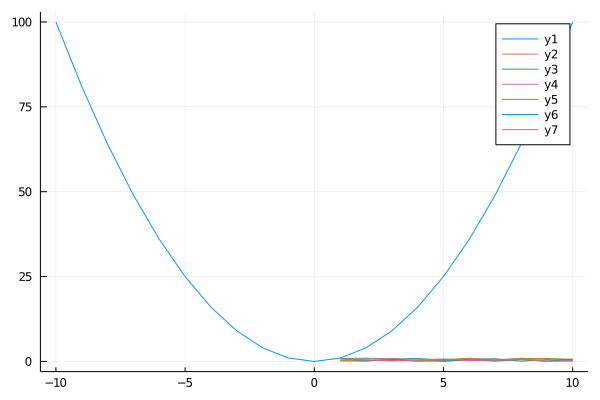

In [59]:
plot!(1:10, rand(10, 3))

OK this looked weird, but OK, seems we can reset the plot by calling the plot function without arguments?

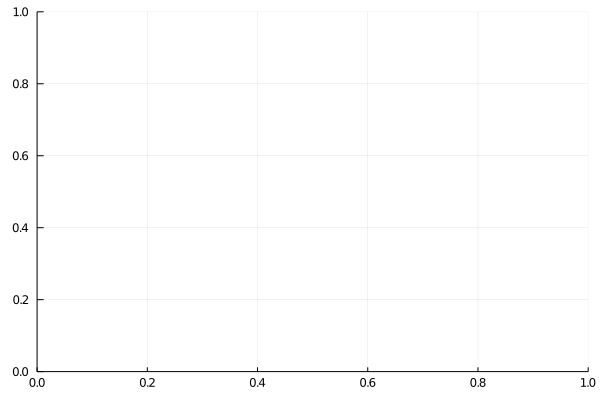

In [73]:
plot()

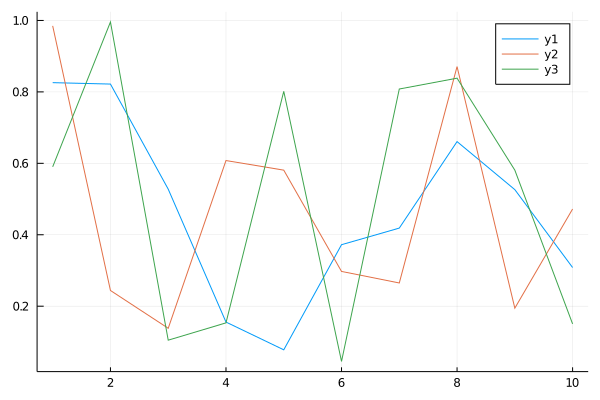

In [74]:
plot!(1:10, rand(10, 3))

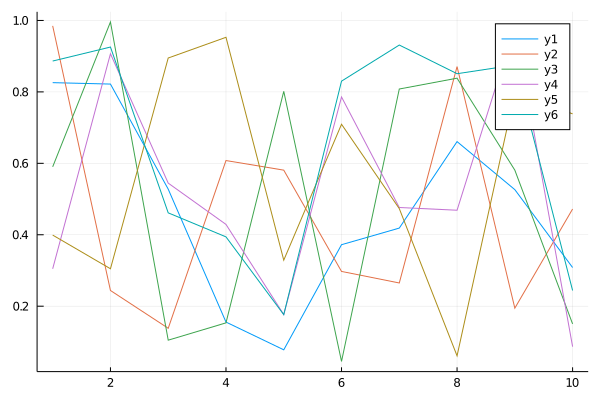

In [75]:
plot!(1:10, rand(10, 3))

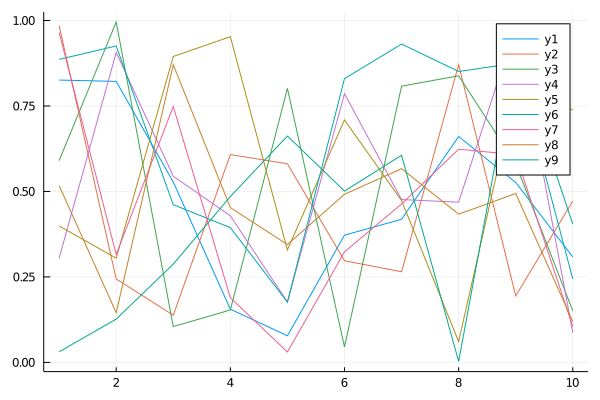

In [76]:
plot!(1:10, rand(10, 3))

That was fun. And maybe it will even be useful at some point. It does give me a slight Leland Wilkinson feel.

But you know what? Some experts speculate that there may be other types of plots. Let's see.

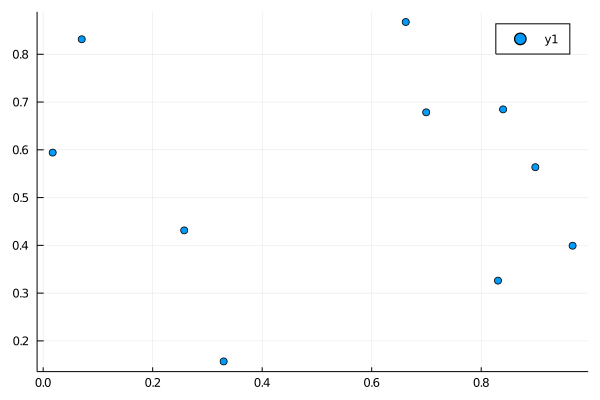

In [77]:
plot(rand(10), rand(10), seriestype=:scatter)

I really have to figure out what those colon-variable thingies are. 

Also, apparantly there are shorthand functions:

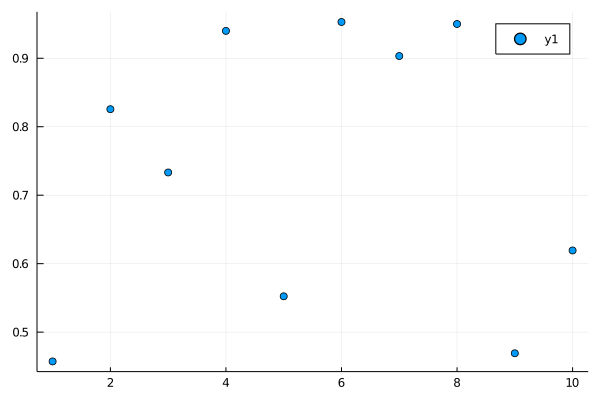

In [81]:
scatter(rand(10))

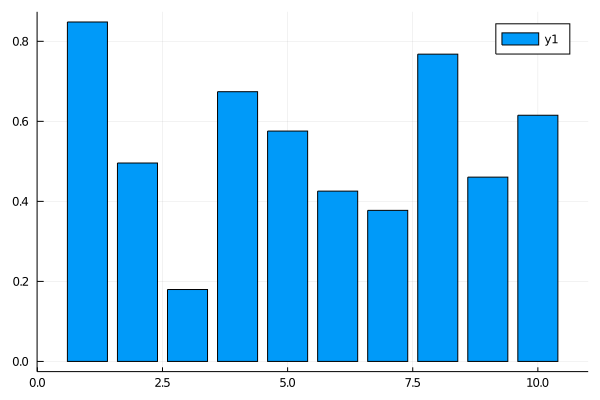

In [80]:
bar(rand(10))

Cool cool cool. Three types of plots. I feel like a king. Also this tutorial says something about plotting backends, even mentioning an old aquaintance *plotly*. Suspects this won't show up in the github though.

In [85]:
plotly()
scatter(rand(10, 2), rand(10, 2))

<!DOCTYPE html>
 
 
 Plots.jl

Looks precious, it hoverses!

There is also some other backend it seems.

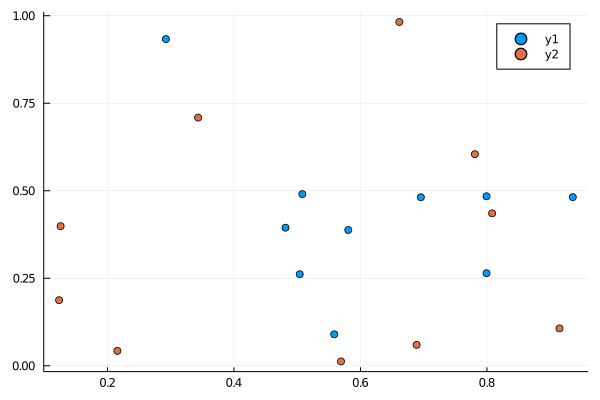

In [86]:
gr()
scatter(rand(10, 2), rand(10, 2))

OK I don't see it, but maybe `gr()` is the default. Anyways, we can now go forth and plot many many plots and collect all the backendses.